In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from routine_formation.model import OrgNetwork
from mesa import batch_run
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
parameters = {
    "num_tasks": 8,  # range(2, 21, 2),
    "num_nodes": range(10, 101, 10),
    "num_new_edges": range(1, 10, 1), # range(1, 10, 1),
    "skills_proportion": 0.1,  # np.linspace(0.1, 0.5, 9),
    "prob_memory": 0.5,  # np.linspace(0, 1, 11),
    "availablity": 0.5  # np.linspace(0.1, 1.0, 11)
}

results = batch_run(OrgNetwork,
                    parameters,
                    iterations=50,
                    max_steps=100, #Here the steps means the number of problem instead of really model steps.
                    data_collection_period=-1)

  0%|          | 0/4500 [00:00<?, ?it/s]

/Users/yingrongmao/anaconda3/lib/python3.11/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


In [4]:
pd.DataFrame(results).to_csv("./batch_data.csv")

In [5]:
df = pd.DataFrame(results)
time_df = pd.DataFrame(df['Time_lst'].tolist(), index=df.index)
time_df.columns = [f'time_p{i+1}' for i in range(time_df.shape[1])]

# Concatenate with the original DataFrame
df = pd.concat([df.drop('Time_lst', axis=1), time_df], axis=1)

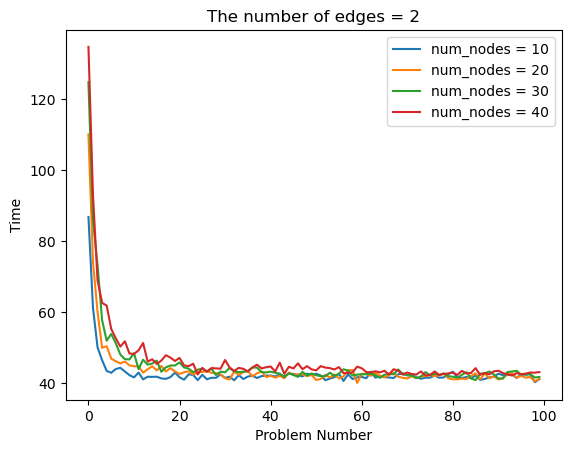

In [6]:
total_line = []
df_1 = df[df["num_new_edges"] == 2]
for i in range(10, 101, 10):
    filtered_df = df_1[df_1["num_nodes"] == i]
    line = []
    for j in range(100):
        column_name = f'time_p{j+1}'
        line.append(filtered_df[column_name].mean())
    total_line.append(line)

for line in total_line[:4]:
    plt.plot(line, label= f'num_nodes = {(total_line.index(line)+1)*10}')

plt.xlabel("Problem Number")
plt.ylabel("Time")
plt.title("The number of edges = 2")

plt.legend()
plt.show()

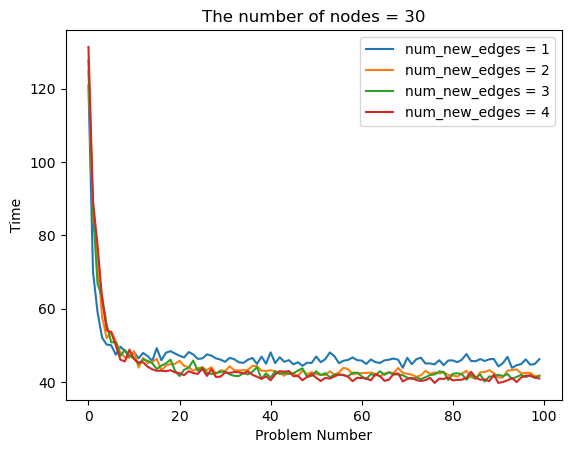

In [7]:
total_line = []
df_1 = df[df["num_nodes"] == 30]
for i in range(1, 8):
    filtered_df = df_1[df_1["num_new_edges"] == i]
    line = []
    for j in range(100):
        column_name = f'time_p{j+1}'
        line.append(filtered_df[column_name].mean())
    total_line.append(line)

for line in total_line[:4]:
    plt.plot(line, label= f'num_new_edges = {total_line.index(line)+1}')

plt.xlabel("Problem Number")
plt.ylabel("Time")
plt.title("The number of nodes = 30")

plt.legend()
plt.show()

20 3
100 3


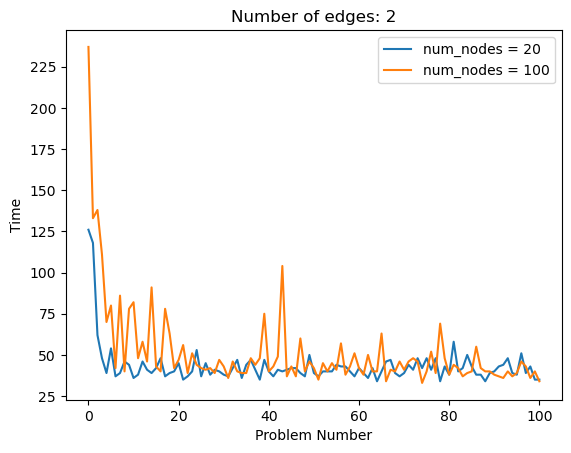

In [8]:
for i in [11,263]:
    n = results[i]["num_nodes"]
    e = results[i]["num_new_edges"]
    print(n, e)
    line = results[i]["Time_lst"]
    # plt.plot(line, label= f'num_new_edges = {n}')
    plt.plot(line, label= f'num_nodes = {n}')

plt.xlabel("Problem Number")
plt.ylabel("Time")
plt.title("Number of edges: 2")

plt.legend()
plt.show()